In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

import numpy as np

In [3]:
iris = load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target number'] = iris.target

iris_df['target names'] = pd.Categorical.from_codes(iris.target, iris.target_names)

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target number,target names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

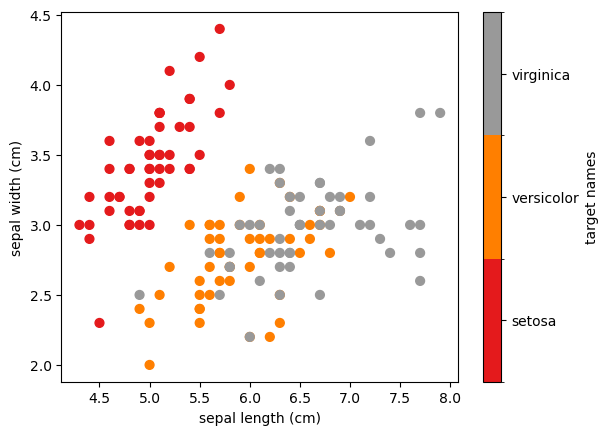

In [4]:
iris_df.plot.scatter('sepal length (cm)', 'sepal width (cm)', c='target names', cmap='Set1', s=40)

In [5]:
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
new_data_point = [[5.1, 3.3, 3, 0.2]]

In [7]:
def decision_frontier(model):
    # Apena duas features para ser bidimensional
    X = iris.data[:, 2:4]
    y = iris.target

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

    model.fit(X_train, y_train)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.02),
        np.arange(y_min, y_max, 0.02)
    )

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    y_pred = model.predict(X)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y_pred, edgecolor="k", s=40)
    plt.xlabel("Petal length (cm)")
    plt.ylabel("Petal width (cm)")
    plt.title("Fronteira de Decisão")
    plt.legend([f'Score: {model.score(X_test, y_test)*100:.2f}%'])
    plt.show()

## Aplicando KNN

In [8]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

1.0

In [9]:
knn.predict(new_data_point)

array([0])

0 corresponde à classe Setosa  
1 corresponde à classe Versicolor  
2 corresponde à classe Virginica  

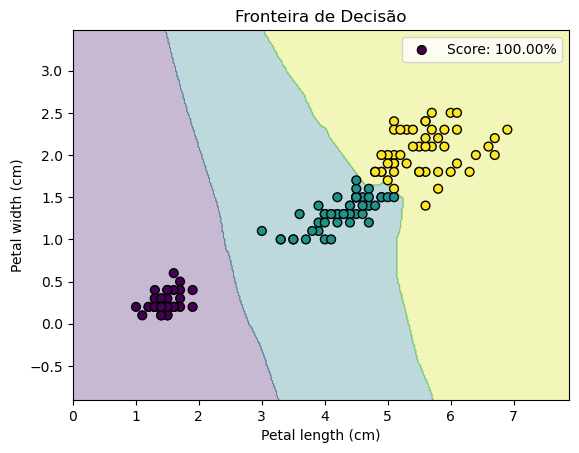

In [10]:
decision_frontier(KNeighborsClassifier(n_neighbors=5))

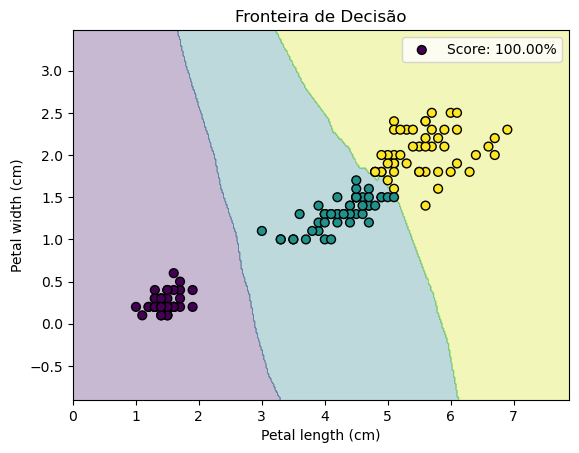

In [11]:
decision_frontier(KNeighborsClassifier(n_neighbors=10))

In [12]:
# KNN from scratch
def distancia_euclideana(x: np.array, y: np.array):
    return np.sqrt(np.sum((x - y) ** 2))

class MyKNN:
    def __init__(self, k=2) -> None:
        self.k = k

    def fit(self, X, y):
        self.X = X
        self.y = y

    def predict(self, data):
        pred_classes = []

        for obs in data:
            # para cada observacao no teste, calcular a distancia para todas as observacoes no treino
            dists = []
            for train_obs in self.X:
                dists.append(distancia_euclideana(train_obs, obs))

            # obtendo o indices das k classes mais proximas
            closests_neighbor_idx = np.argsort(dists)[:self.k]

            # obtendo as k classes mais proximas
            y_closests_neighbor = self.y[closests_neighbor_idx]

            # obtendo a classe mais frequente entre as k classes mais proximas
            classes, counts = np.unique(y_closests_neighbor, return_counts=True)
            class_most_frequent = classes[np.argmax(counts)]

            # adicionando a classes mais proxima na lista de predicoes
            pred_classes.append(class_most_frequent)

        return np.array(pred_classes)

In [13]:
knn = MyKNN(k=3)
knn.fit(X_train, y_train)

In [14]:
from sklearn.metrics import accuracy_score

predictions = knn.predict(X_test)

accuracy_score(y_true=y_test, y_pred=predictions)

1.0

## Aplicando arvore de decisão

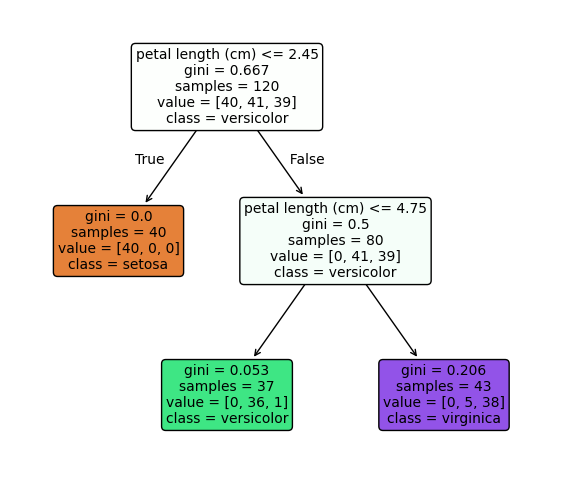

In [11]:
dtc = DecisionTreeClassifier(max_depth=2, random_state=42)
dtc.fit(X_train, y_train)

plt.figure(figsize=(7,6))
plot_tree(
    dtc,
    feature_names=iris.feature_names, 
    class_names=iris.target_names,
    filled=True, # Colore os nós para indicar a pureza (MSE)
    rounded=True, # Arredonda as caixas
    fontsize=10 
)
plt.show()

In [12]:
dtc.predict(new_data_point)  # Errou

array([1])

In [13]:
dtc.score(X_test, y_test)

0.9666666666666667

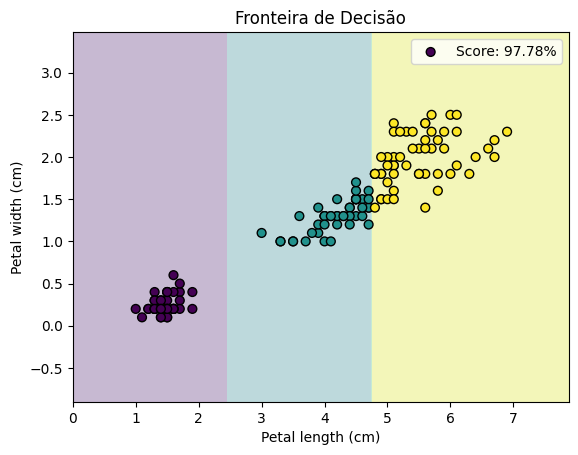

In [14]:
decision_frontier(DecisionTreeClassifier(max_depth=2))
# Precisão é diferente pois aqui só se consideram duas features

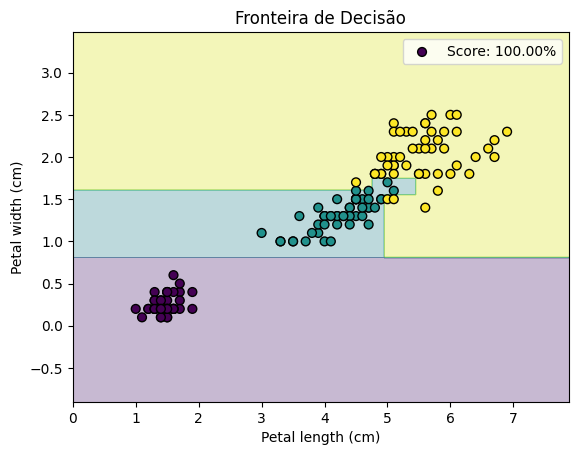

In [15]:
decision_frontier(DecisionTreeClassifier(max_depth=10))